**Regresion Lineal:**

Ejemplo del conjunto de datos interno de Sklearn sobre el precio de la vivienda en Boston

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn import datasets, metrics 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.datasets import fetch_california_housing

In [ ]:
# Cargamos la base de datos California
#boston = datasets.load_boston(return_X_y=False) 
california = fetch_california_housing()

In [ ]:
print(california.data.shape)
print(california.target.shape)

(20640, 8)
(20640,)


In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
# El metodo DESCR provee las caracteristicas del dataset de California.
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
california_df = pd.DataFrame(california.data)

In [ ]:
california_df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
california_df.columns = california.feature_names
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
california_df = california_df.iloc[0:1000]
#california_df = california_df.sample(n=1000)
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
995,4.8624,11.0,5.680000,1.044706,5826.0,2.741647,37.71,-121.75
996,9.1531,25.0,5.811765,0.952941,254.0,2.988235,37.74,-121.77
997,4.7361,22.0,6.080220,1.036264,2474.0,2.718681,37.70,-121.80
998,5.4324,17.0,5.975831,0.965257,2222.0,3.356495,37.69,-121.80


In [ ]:
# defining feature or independent variables (X) and  target or dependent variable (y) 
X = california_df
y = california.target # California Housing Price 

In [ ]:
print(X.shape)
print(y.shape)

(1000, 8)
(20640,)


In [ ]:
y = california.target[:1000]
#y = np.random.choice(california.target, size=1000)
#y

In [ ]:
print(X.shape)
print(y.shape)

(1000, 8)
(1000,)


In [ ]:
# dividiendo X and y en cojunto de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10) 

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 8)
(750,)
(250, 8)
(250,)


In [ ]:
# creamos un objeto de regresion lineal
lr = LinearRegression() 

In [ ]:
# entrenamos el modelo usando el conjunto de entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Check the value for Slope   
m = lr.coef_
print('Valor de m (pendiente): \n', m)

Valor de m (pendiente): 
 [ 3.92545492e-01  1.07760778e-03 -3.08526197e-02  1.09318961e-02
  1.04329859e-04 -1.00865440e-01  2.51734488e+00  6.57860072e-01]


In [ ]:
c = lr.intercept_
print ('Valor de c (Intercepto) ', c)

Valor de c (Intercepto)  -13.78928762377605


In [ ]:
y_pred = lr.predict(X_test)
#print(y_pred)

In [ ]:
print(y_pred.shape)

(250,)


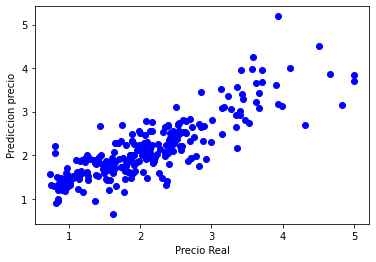

In [ ]:
plt.scatter(y_test, y_pred, color = "b", marker = "o" )

# putting labels 
plt.xlabel('Precio Real') 
plt.ylabel('Prediccion precio') 

# function to show plot 
plt.show() 

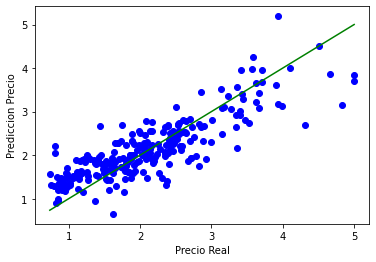

In [ ]:
plt.scatter(y_test, y_pred, color = "b", marker = "o" )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'g')
# putting labels 
plt.xlabel('Precio Real') 
plt.ylabel('Prediccion Precio') 

# function to show plot 
plt.show() 

El paso final es evaluar el rendimiento del algoritmo. Este paso es particularmente importante para comparar qué tan bien funcionan diferentes algoritmos en un conjunto de datos en particular. Para los algoritmos de regresión, se utilizan comúnmente tres métricas de evaluación:

1. Mean Absolute Error (MAE)

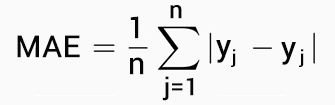

2. Mean Squared Error (MSE) 

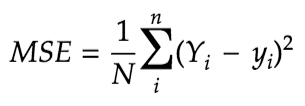

3. Root Mean Squared Error (RMSE) 

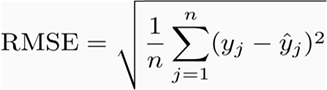
4. Mean absolute percentage error (MAPE) 

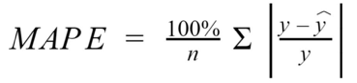

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 0.3740576506576982
Mean Squared Error: 0.23496086340042735
Root Mean Squared Error: 0.48472761774054857
MAPE: 0.2177389672430457


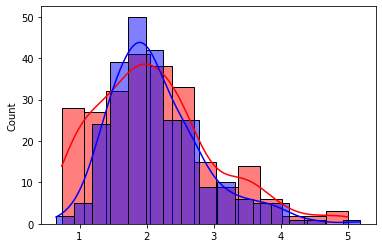

In [ ]:
import seaborn as sns

ax1 = sns.histplot(y_test, color="r", kde=True, label="Actual Value")
sns.histplot(y_pred, kde=True, color="b", label="Predicted Values" , ax=ax1)

In [ ]:
print(r2_score(y_test, y_pred))

0.6941740485791738


**OTRO EJEMPLO:**

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [ ]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

#print(diabetes.data.shape)
#print(diabetes.target.shape)
diabetes.keys()


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
diabetes_df = pd.DataFrame(diabetes.data)
diabetes_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
diabetes_df.columns = diabetes.feature_names
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
# El metodo DESCR provee las caracteristicas del dataset de Diabetes.
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

lnr = LinearRegression()

#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)
lnr.fit(X_train, y_train)
y_pred = lnr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE: ', mape(y_test, y_pred))

Mean Absolute Error: 43.88490072658543
Mean Squared Error: 2854.4789352804755
Root Mean Squared Error: 53.42732386410979
MAPE:  0.38392222138376614


**Regresion Polinomial:**

Aunque la regresión polinomial ajusta un modelo no lineal a los datos, como problema de estimación estadística es lineal, en el sentido de que la función de regresión es lineal en los parámetros desconocidos que se estiman a partir de los datos. Por esta razón, la regresión polinomial se considera un caso especial de regresión lineal múltiple.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

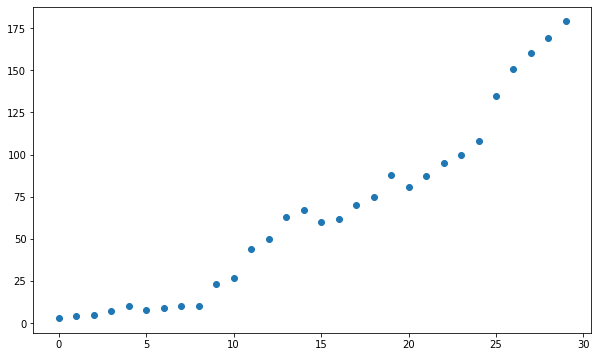

In [ ]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [ ]:
poly_features = poly.fit_transform(x.reshape(-1, 1))
print(x.reshape(-1, 1).shape)
print(poly_features.shape)

(30, 1)
(30, 2)


In [ ]:
poly_reg_model = LinearRegression()

In [ ]:
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [ ]:
y_predicted = poly_reg_model.predict(poly_features)

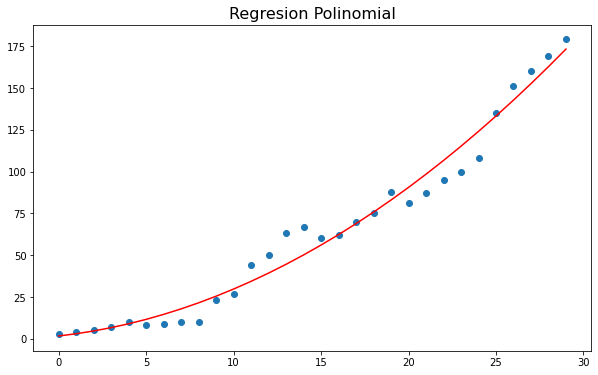

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Regresion Polinomial", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()